In [1]:
#importing needed packages and our dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
mydata = pd.read_csv("CoderGirlDataset2.csv")

In [2]:
#information about the dataset
mydata.columns
mydata.head()
mydata.describe()
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9654 entries, 0 to 9653
Columns: 146 entries, QKEY to WEIGHT_W68
dtypes: float64(119), int64(11), object(16)
memory usage: 10.8+ MB


In [3]:
#See data
pd.DataFrame(data=mydata)

,QKEY,INTERVIEW_START_W68,INTERVIEW_END_W68,DEVICE_TYPE_W68,LANG_W68,FLOYDFOL_W68,FLOYDDISC_W68,FLOYDCOVER_W68,FLOYDATTN_W68,FLOYDATTN2_a_W68,...,F_REG,F_IDEO,F_ACSWEB,F_VOLSUM,F_INC_TIER2,F_HISP_ORIGIN,F_YEARSINUS,F_PARTYSUMIDEO,FLAG_W68,WEIGHT_W68
0,1.001970e+05,6/7/2020 1:05,6/7/2020 19:16,3,1,2.0,3.0,1.0,3.0,3.0,...,1,3.0,1,1.0,2.0,6.0,1.0,3,2,0.312835
1,1.002600e+05,6/7/2020 1:35,6/7/2020 1:58,3,1,2.0,3.0,4.0,3.0,3.0,...,1,1.0,1,2.0,2.0,6.0,1.0,1,2,0.640210
2,1.003140e+05,6/6/2020 13:29,6/6/2020 13:50,2,1,2.0,4.0,2.0,3.0,1.0,...,1,3.0,1,1.0,2.0,6.0,1.0,2,2,0.432858
3,1.003630e+05,6/5/2020 17:46,6/5/2020 17:57,2,1,2.0,3.0,3.0,3.0,2.0,...,1,3.0,1,1.0,3.0,6.0,1.0,3,2,0.389315
4,1.004460e+05,6/5/2020 18:37,6/5/2020 18:49,1,1,2.0,2.0,2.0,3.0,3.0,...,1,4.0,1,1.0,2.0,6.0,1.0,4,2,0.284810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9649,2.020000e+11,6/10/2020 0:39,6/10/2020 0:48,2,1,2.0,2.0,4.0,1.0,3.0,...,1,5.0,1,2.0,1.0,3.0,1.0,4,2,0.134519
9650,2.020000e+11,6/5/2020 18:19,6/5/2020 18:41,2,2,1.0,3.0,2.0,1.0,3.0,...,1,3.0,1,2.0,1.0,3.0,4.0,2,1,0.263669
9651,2.020000e+11,6/5/2020 17:39,6/5/2020 18:09,2,2,1.0,2.0,3.0,1.0,1.0,...,1,3.0,1,2.0,1.0,5.0,4.0,2,1,1.664526
9652,2.020000e+11,6/9/2020 15:47,6/9/2020 15:54,2,2,3.0,4.0,3.0,3.0,2.0,...,,2.0,1,1.0,1.0,5.0,NaN,9,1,0.613067


In [4]:
#Organization of the dataset

In [5]:
#Mean of Variables

#adding M_Activisim
race_active = ((mydata["RACEACTIVISM_a_W68"]+ mydata["RACEACTIVISM_b_W68"] + mydata["RACEACTIVISM_c_W68"] + mydata["RACEACTIVISM_d_W68"] + mydata["RACEACTIVISM_e_W68"])/5)
mydata["M_RACEACTIVISM"] = race_active


#adding M_Race
racism = ((mydata["RACESURV53_a_W68"]+ mydata["RACESURV53_b_W68"] + mydata["RACESURV53_e_W68"]
              + mydata["RACESURV53_f_W68"] + mydata["RACESURV53_h_W68"])/5)
mydata["M_Racism"] = racism

In [6]:
#Downsizing my dataset
mydata_clean = {
    'Sex': mydata['F_SEX'],
    'Age': mydata['F_AGECAT'],
    'Education': mydata["F_EDUCCAT"],
    'Race': mydata["F_RACECMB"],
    'Region_US': mydata["F_CREGION"],
    'Volenteer': mydata["F_VOLSUM"],
    'Floyd Attention': mydata["FLOYDATTN_W68"], 
    'Trumps Message BLM': mydata["FLOYDTRUMPMSSG_W68"],
    'Legal Status': mydata["LGLSTATUS_W68"],
    'DACA': mydata["DACA2018_W68"],
    'COVID Coverage': mydata["COVIDFOL_W68"],
    'COVID Conspiracy': mydata["COVIDPLANHRD_W68"],
    'Community Mask': mydata["COVIDMASK2_W68"],
    'COVID Count': mydata["COVIDMVKNW_W68"],
    'M_Racism':mydata["M_Racism"],
    'M_Activism':mydata["M_RACEACTIVISM"],
    'Party': mydata["F_PARTY_FINAL"]
}

mydata_clean1 = pd.DataFrame(data= mydata_clean)

mydata_clean1


,Sex,Age,Education,Race,Region_US,Volenteer,Floyd Attention,Trumps Message BLM,Legal Status,DACA,COVID Coverage,COVID Conspiracy,Community Mask,COVID Count,M_Racism,M_Activism,Party
0,2.0,4.0,2.0,1.0,2,1.0,3.0,4.0,2.0,1.0,1.0,3.0,1.0,2,1.8,2.8,2.0
1,1.0,4.0,1.0,1.0,4,2.0,3.0,1.0,1.0,2.0,2.0,3.0,1.0,2,1.8,3.2,1.0
2,1.0,4.0,2.0,1.0,2,1.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,2,2.0,2.8,1.0
3,2.0,2.0,1.0,1.0,1,1.0,3.0,3.0,2.0,1.0,1.0,3.0,1.0,2,1.8,2.6,2.0
4,2.0,3.0,1.0,3.0,1,1.0,3.0,4.0,2.0,1.0,2.0,2.0,1.0,2,1.6,2.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9649,2.0,1.0,1.0,1.0,3,2.0,1.0,4.0,2.0,1.0,2.0,2.0,1.0,1,1.2,1.4,2.0
9650,2.0,3.0,3.0,5.0,3,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2,2.0,3.0,1.0
9651,1.0,3.0,3.0,1.0,3,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2,1.6,2.8,3.0
9652,2.0,1.0,3.0,4.0,4,1.0,3.0,3.0,2.0,2.0,4.0,3.0,5.0,2,2.0,3.0,4.0


In [7]:
#Investigating Missing Data

In [8]:
#Missing values for each variable
missing_values_count = mydata_clean1.isnull().sum()
missing_values_count

Sex                    19
Age                    36
Education              18
Race                  211
Region_US               0
Volenteer              11
Floyd Attention        80
Trumps Message BLM    239
Legal Status           94
DACA                  151
COVID Coverage         32
COVID Conspiracy       39
Community Mask         48
COVID Count            15
M_Racism               97
M_Activism             99
Party                  90
dtype: int64

In [9]:
#Missing
# how many total missing values do we have?
total_cells = np.product(mydata_clean1.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = ((total_missing/total_cells) * 100)

#Table of data

Missing_Values_Table = {"Total Cells in Dataset": [total_cells], 
        "Total Missing Cells in Dataset": [total_missing],
        "Percent of Missing Data": [percent_missing]}

pd.DataFrame(Missing_Values_Table)
#less than 1% of the data is missing


,Total Cells in Dataset,Total Missing Cells in Dataset,Percent of Missing Data
0,164118,1279,0.779317


In [10]:
# I belive that most of the missing data is cause by the fact that the
# demographic information is comming from a survey from 2018. The current survey data
# was collected in 2020. Some of the participants in this current survey may not have participated in the 2018 survey. 
#However, most of the data in this dataset is nominal data, making it more difficult to determine the indented values. 
#Therefore, I am just going to delete the missing values. 
#The Percent of missing data is less than 1%, so it should not be too big of problem. 

In [11]:
#Dropping Missing values 

# remove all the rows that contain a missing value
newdata = mydata_clean1.dropna()
newdata

,Sex,Age,Education,Race,Region_US,Volenteer,Floyd Attention,Trumps Message BLM,Legal Status,DACA,COVID Coverage,COVID Conspiracy,Community Mask,COVID Count,M_Racism,M_Activism,Party
0,2.0,4.0,2.0,1.0,2,1.0,3.0,4.0,2.0,1.0,1.0,3.0,1.0,2,1.8,2.8,2.0
1,1.0,4.0,1.0,1.0,4,2.0,3.0,1.0,1.0,2.0,2.0,3.0,1.0,2,1.8,3.2,1.0
2,1.0,4.0,2.0,1.0,2,1.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,2,2.0,2.8,1.0
3,2.0,2.0,1.0,1.0,1,1.0,3.0,3.0,2.0,1.0,1.0,3.0,1.0,2,1.8,2.6,2.0
4,2.0,3.0,1.0,3.0,1,1.0,3.0,4.0,2.0,1.0,2.0,2.0,1.0,2,1.6,2.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9648,1.0,1.0,1.0,1.0,3,2.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,2,2.0,2.6,1.0
9649,2.0,1.0,1.0,1.0,3,2.0,1.0,4.0,2.0,1.0,2.0,2.0,1.0,1,1.2,1.4,2.0
9650,2.0,3.0,3.0,5.0,3,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2,2.0,3.0,1.0
9651,1.0,3.0,3.0,1.0,3,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2,1.6,2.8,3.0


In [12]:
# Participants Lost

#Number of rows for inital dataset
index = mydata_clean1.index
inital_rows = len(index)
inital_rows

#number of rows for final dataset
index2 = newdata.index
final_rows = len(index2)
final_rows

#Total lost rows (participants)
total_lost_participants = (inital_rows - final_rows)

#Table for last data
Lost_Data_Table = {"Inital Participants": [inital_rows], 
        "Final Participants": [final_rows],
        "Total Lost Participants": [total_lost_participants]}

pd.DataFrame(Lost_Data_Table)

,Inital Participants,Final Participants,Total Lost Participants
0,9654,8703,951


In [13]:
#Frequency Plots

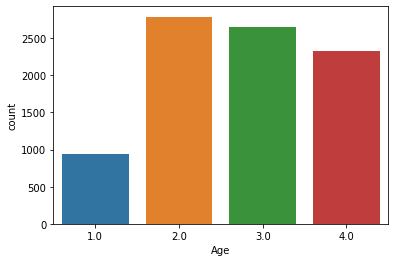

In [14]:
#Age
age_plot = sns.countplot(x="Age",data=newdata)


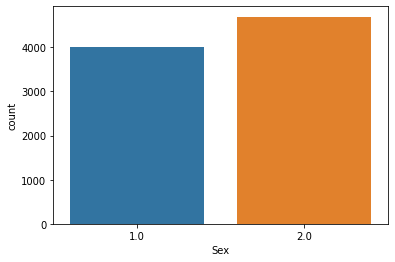

In [15]:
#Gender
sex_plot = sns.countplot(x="Sex",data= newdata)


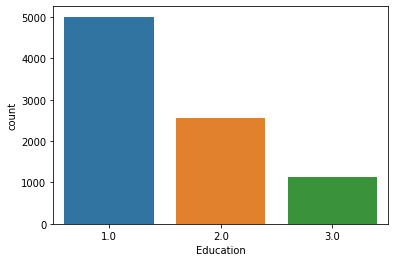

In [16]:
#education
edu_plot = sns.countplot(x="Education", data = newdata)

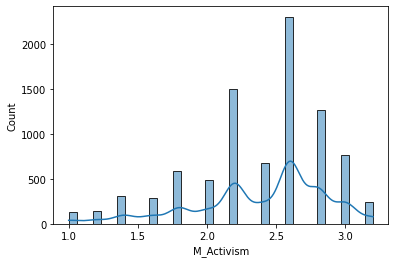

In [17]:
#Activism 
act_plot = sns.histplot(data= newdata, x="M_Activism", kde = True)


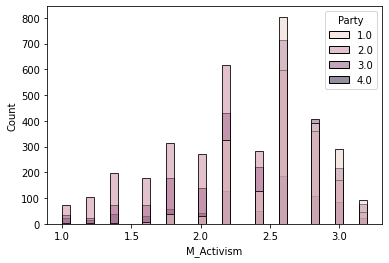

In [18]:
#Activism by Sex
act_sex_plot = sns.histplot(data=newdata, x="M_Activism", hue="Party")

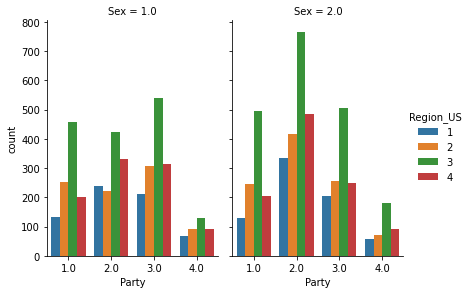

In [19]:
sns.catplot(x="Party", hue="Region_US", col="Sex",
                data=newdata, kind="count",
                height=4, aspect=.7)

<AxesSubplot:xlabel='M_Racism', ylabel='Count'>

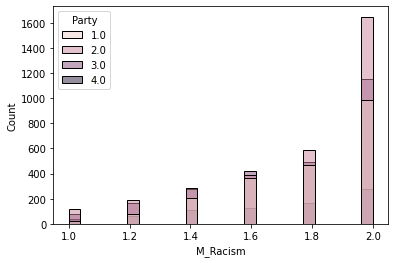

In [20]:
sns.histplot(data=newdata, x="M_Racism", hue="Party")

<AxesSubplot:xlabel='M_Racism'>

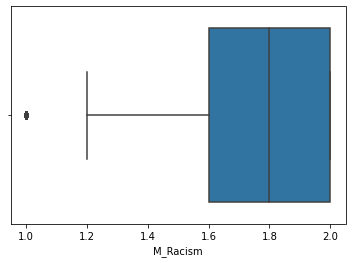

In [44]:
sns.boxplot(x=newdata['M_Racism'])M_Activism

<AxesSubplot:xlabel='M_Activism'>

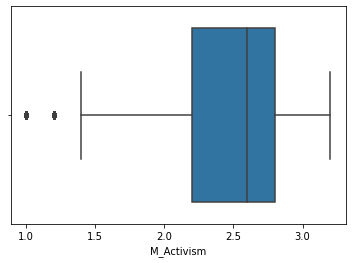

In [45]:
sns.boxplot(x=newdata['M_Activism'])

In [53]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(newdata["M_Racism"]))
z
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


In [21]:
newdata

,Sex,Age,Education,Race,Region_US,Volenteer,Floyd Attention,Trumps Message BLM,Legal Status,DACA,COVID Coverage,COVID Conspiracy,Community Mask,COVID Count,M_Racism,M_Activism,Party
0,2.0,4.0,2.0,1.0,2,1.0,3.0,4.0,2.0,1.0,1.0,3.0,1.0,2,1.8,2.8,2.0
1,1.0,4.0,1.0,1.0,4,2.0,3.0,1.0,1.0,2.0,2.0,3.0,1.0,2,1.8,3.2,1.0
2,1.0,4.0,2.0,1.0,2,1.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,2,2.0,2.8,1.0
3,2.0,2.0,1.0,1.0,1,1.0,3.0,3.0,2.0,1.0,1.0,3.0,1.0,2,1.8,2.6,2.0
4,2.0,3.0,1.0,3.0,1,1.0,3.0,4.0,2.0,1.0,2.0,2.0,1.0,2,1.6,2.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9648,1.0,1.0,1.0,1.0,3,2.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,2,2.0,2.6,1.0
9649,2.0,1.0,1.0,1.0,3,2.0,1.0,4.0,2.0,1.0,2.0,2.0,1.0,1,1.2,1.4,2.0
9650,2.0,3.0,3.0,5.0,3,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2,2.0,3.0,1.0
9651,1.0,3.0,3.0,1.0,3,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2,1.6,2.8,3.0


In [22]:
#model 1

In [23]:
#add packages
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn import metrics

In [24]:
#get usable data
dummy_df= pd.get_dummies(newdata.drop(columns=["Party"]))

In [25]:
#divide dataset
X = dummy_df
y = newdata["Party"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
#run model 
model = DecisionTreeClassifier(random_state=0, max_depth=2)
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.5821727019498607

In [27]:
dummy_df.head()

,Sex,Age,Education,Race,Region_US,Volenteer,Floyd Attention,Trumps Message BLM,Legal Status,DACA,COVID Coverage,COVID Conspiracy,Community Mask,M_Racism,M_Activism,COVID Count_,COVID Count_1,COVID Count_2
0,2.0,4.0,2.0,1.0,2,1.0,3.0,4.0,2.0,1.0,1.0,3.0,1.0,1.8,2.8,0,0,1
1,1.0,4.0,1.0,1.0,4,2.0,3.0,1.0,1.0,2.0,2.0,3.0,1.0,1.8,3.2,0,0,1
2,1.0,4.0,2.0,1.0,2,1.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.8,0,0,1
3,2.0,2.0,1.0,1.0,1,1.0,3.0,3.0,2.0,1.0,1.0,3.0,1.0,1.8,2.6,0,0,1
4,2.0,3.0,1.0,3.0,1,1.0,3.0,4.0,2.0,1.0,2.0,2.0,1.0,1.6,2.6,0,0,1


In [28]:
#model 2

In [58]:
#run model
model2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model2 = model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5797353760445683


In [30]:
#A decision tree model was computed to predict Political Party Affiliation (Democrat, Republican, Independent, Other). 
#Taking into acount demographic information like like sex, race, age, education, and Region, as well as more personal/political
#belifes, like BLM opinions, Immigration policies, and COVID compliance. The First model was able to predict with 58% accuracy 
#Which political party individuals will fall into. This model used gini impurities to determine best splits. This accuracy is fairly 
#acceptable considering random chance at selecting party affiliation is around 25%. The second model was also able to predict with 58% accuracy 
#Which political party individuals will fall into. This model used entropy to determine best splits. This accuracy is fairly 
#acceptable considering random chance at selecting party affiliation is around 25%.